In [1]:
import pandas as pd

df = pd.read_csv('../data/forestfires_classification.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,F
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,F
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,F
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,F
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,F


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    object 
dtypes: float64(7), int64(3), object(3)
memory usage: 52.6+ KB


In [3]:
df.describe(include = 'all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,NaN
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,NaN
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,NaN
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,NaN
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,NaN
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,NaN


In [4]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

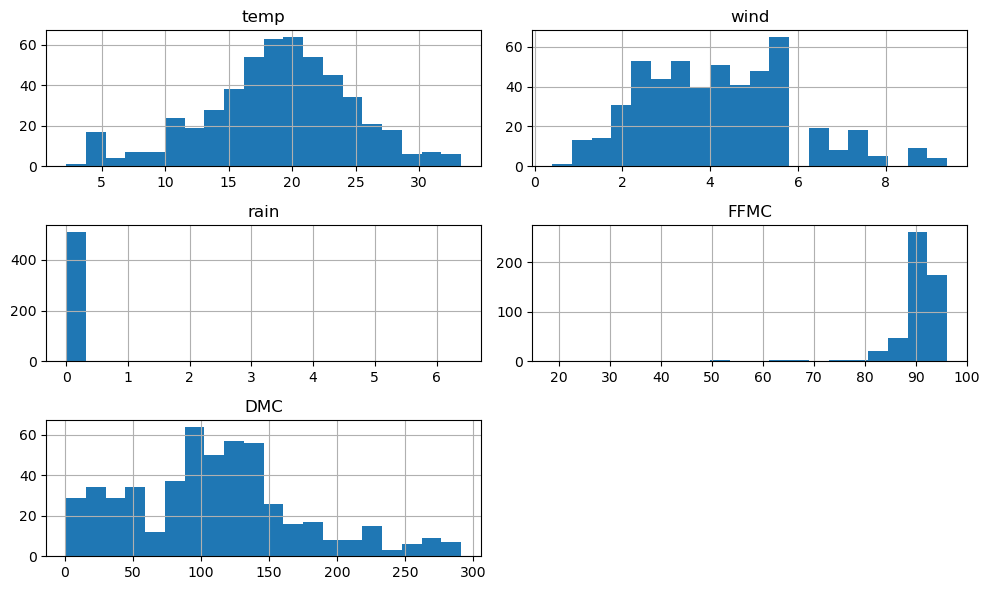

In [7]:
import matplotlib.pyplot as plt

df[['temp', 'wind', 'rain', 'FFMC', 'DMC']].hist(bins=20, figsize=(10,6))
plt.tight_layout()
plt.show()

In [9]:
df['rain'].unique()

array([0. , 0.2, 1. , 6.4, 0.8, 0.4, 1.4])

In [10]:
df['rain'].describe()

count    517.000000
mean       0.021663
std        0.295959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.400000
Name: rain, dtype: float64

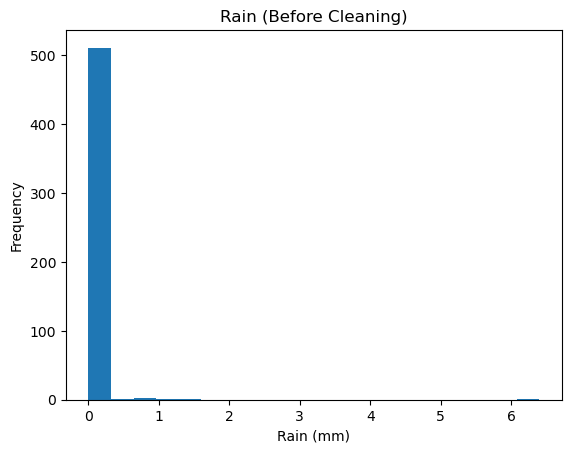

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['rain'], bins=20)
plt.title("Rain (Before Cleaning)")
plt.xlabel("Rain (mm)")
plt.ylabel("Frequency")
plt.show()

In [12]:
df_cleaned = df[df['rain'] <= 2.0]

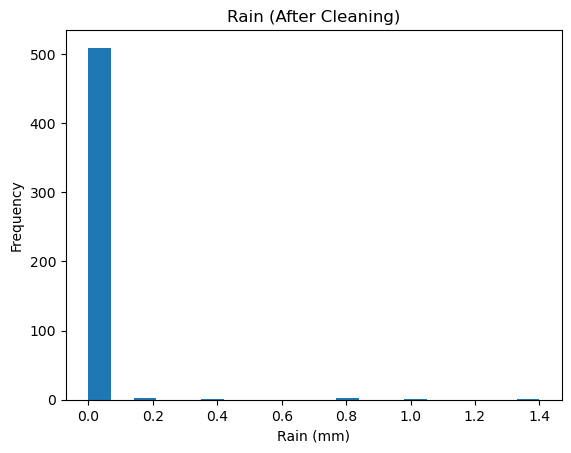

In [13]:
plt.hist(df_cleaned['rain'], bins=20)
plt.title("Rain (After Cleaning)")
plt.xlabel("Rain (mm)")
plt.ylabel("Frequency")
plt.show()

In [15]:
df_cleaned['rain'].describe()

count    516.000000
mean       0.009302
std        0.092803
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.400000
Name: rain, dtype: float64

In [17]:
df_cleaned = df_cleaned.copy()  
df_cleaned['area'] = df_cleaned['area'].map({'F': 0, 'T': 1})

In [18]:
df_cleaned['area'].unique()

array([nan])

In [19]:
df_cleaned['area'].head(20).tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [20]:
df['area'].head(20).tolist()

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F']

In [21]:
df = df.copy()   # make sure df is safe to edit
df['area'] = df['area'].str.strip()  # remove hidden spaces, just in case
df['area'] = df['area'].map({'F': 0, 'T': 1})
df['area'].unique()

array([0, 1])

In [22]:
df_cleaned = df[df['rain'] <= 2.0].copy()

In [23]:
df_cleaned['area'].unique()

array([0, 1])

In [24]:
df_cleaned['area'].value_counts(dropna=False)

area
1    291
0    225
Name: count, dtype: int64

In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       516 non-null    int64  
 1   Y       516 non-null    int64  
 2   month   516 non-null    object 
 3   day     516 non-null    object 
 4   FFMC    516 non-null    float64
 5   DMC     516 non-null    float64
 6   DC      516 non-null    float64
 7   ISI     516 non-null    float64
 8   temp    516 non-null    float64
 9   RH      516 non-null    int64  
 10  wind    516 non-null    float64
 11  rain    516 non-null    float64
 12  area    516 non-null    int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 56.4+ KB


In [26]:
df_cleaned.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [27]:
df_cleaned.to_csv('../data/forestfires_cleaned.csv', index=False)